README: Scroll down for Final Project Part 2

# Final Project Part 1 - Proposal 1: Credit Default Prediction

### The target variable you want to predict

The target variable that I want to predict is if the customer will default next month. 

### How predicting that target variable could help with some kind of decision

Predicting this variable will help the bank determine whether or not to provide a credit line increase or potentially a credit line decrease to customers to either maximize revenue or minimize loss. My assumption is if the customer is paying consistently every month, the probability of defaulting in the next payment is very unlikely. 

### The features you want to use to predict that target variable

o	The features used to predict this variable from the data are: 
- Amount of given credit 
- Gender
- Education
- Marital Status
- Age 
- History of Repayment Status from April – September 2015 (each month is a separate column)
- Amount of bill statement from April – September 2015
- Amount of previous payment from April – September 2015


### Goals and success metrics

The goal is to be able to predict if the customer is going to default the next month (October 2015). 

### Risks or limitations

The main limitation is there is only data from April – September 2015 and may not be sufficient enough to predict if the customer is going to default. Using only 6 months of data to predict if a customer is going to default is limited because the entire life cycle of the card could provide better insights. 

In [76]:
import pandas as pd
credit_card_default = pd.read_csv('./data/credit_card_default.csv')
credit_card_default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [77]:
credit_card_default.shape

#22,500 rows and 25 columns

(22500, 25)

In [78]:
credit_card_default.isnull().sum()

#no missing data 

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [79]:
credit_card_default.loc[:,'default payment next month'].value_counts()

0    17412
1     5088
Name: default payment next month, dtype: int64

In [80]:
5088/(17412+5088)

0.22613333333333333

# Final Project Part 2 - Exploratory Data Analysis

Variable descriptions: This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.

This study reviewed the literature and used the following 23 variables as explanatory variables:

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
- X6 = the repayment status in September, 2005;
- X7 = the repayment status in August, 2005; . . .;
- X11 = the repayment status in April, 2005. The measurement scale for the repayment status is:
- -1 = pay duly;
- 1 = payment delay for one month;
- 2 = payment delay for two months; . . .;
- 8 = payment delay for eight months;
- 9 = payment delay for nine months and above.
- -2 = indicates no consumption in the month, and a value of
- 0 = indicates the use of revolving credit (equivalent to prepayment)
- X12-X17: Amount of bill statement (NT dollar).
- X12 = amount of bill statement in September, 2005;
- X13 = amount of bill statement in August, 2005; . . .;
- X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar).
- X18 = amount paid in September, 2005;
- X19 = amount paid in August, 2005; . . .;
- X23 = amount paid in April, 2005.

# Build a first-pass model on your data:

- Load in your data set.
- Separate your target column from potential feature columns.
- Get those columns in a clean enough state that you can build a model with them. It is OK to be fast and loose at this stage, e.g. by simply dropping rows or columns that have missing values or have string values that would take some work to make usable.
- Do a train/test split.
- Fit some kind of regression or classification model on your training set. Be sure to choose the correct type: regression if your target variable is a number, classification if it is a category.
- Use an appropriate metric to evaluate your model on both the training set and the test set. Be sure to choose a regression metric for a regression problem (e.g. MSE, RMSE, MAE, R-squared) or a classification metric for a classification problem (e.g. accuracy, $F_1$).
- Compare your model's performance to that of a null model, e.g. by calculating R^2 for a regression model, comparing accuracy for a classification model to the frequency of the most common class, or calculating the same metric for your model and for a set of predictions that is simply the average value of the target variable for a regression model or the most common class for a classification model.
- State whether this first-pass model appears to be overfitting or underfitting.

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import metrics

plt.style.use('fivethirtyeight')
%matplotlib inline

In [82]:
#Setting target column 
target_col = 'default payment next month'

X = credit_card_default.drop(target_col, axis='columns')
y = credit_card_default.loc[:, target_col]

In [83]:
#Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [84]:
#First Pass = Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
#Score the test and train data. 
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))
#Currently the model is not overfitting or underfitting. There is low variance but high bias, meaning that there can be a better model than logistic regression

0.7719111111111111
0.7744592592592593


In [86]:
y.value_counts(normalize=True)

0    0.773867
1    0.226133
Name: default payment next month, dtype: float64

In [87]:
#confusion matrix, accuracy, precision, and recall for first pass of the model
y_pred = lr.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print('accuracy', 4342/1281)
print('precision', 0/1281)
print('recall', 0/2)

[[4342    2]
 [1281    0]]
accuracy 3.389539422326308
precision 0.0
recall 0.0


In [88]:
#obtain the probability of default payment next month of Yes ('1' = yes default payment next month)
y_pred_prob = lr.predict_proba(X_test)[:,1]
y_pred_prob 

array([0.00516576, 0.26005841, 0.12349872, ..., 0.09998005, 0.31045585,
       0.24138567])

In [89]:
#lowering the threshold to .3 to obtain true positives
y_pred_low_thresh = y_pred_prob > .3
metrics.confusion_matrix(y_test, y_pred_low_thresh)

array([[3055, 1289],
       [ 629,  652]])

In [90]:
#identifying the best score and threshold 
from sklearn import metrics

best_score = -1
best_threshold = -1

for threshold in sorted(y_pred_prob):
    y_pred_thresh = y_pred_prob > threshold
    score = metrics.f1_score(y_test, y_pred_thresh)
    if score > best_score:
        best_score = score
        best_threshold = threshold

print(best_score, best_threshold)

0.42311411992263054 0.2555166544511635


/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [91]:
y_pred_thresh = y_pred_prob > best_threshold
metrics.confusion_matrix(y_test, y_pred_thresh)

array([[2364, 1980],
       [ 406,  875]])

In [92]:
#Calculate the accuracy score, precision score, recall score, f1 score, fbeta2 score and fbeta.5 score.
print(metrics.accuracy_score(y_test, y_pred_thresh))
print(metrics.precision_score(y_test, y_pred_thresh))
print(metrics.recall_score(y_test, y_pred_thresh))
print(metrics.f1_score(y_test, y_pred_thresh))
print(metrics.fbeta_score(y_test, y_pred_thresh, beta=2))
print(metrics.fbeta_score(y_test, y_pred_thresh, beta=.5))

0.5758222222222222
0.3064798598949212
0.6830601092896175
0.42311411992263054
0.5483143251033964
0.34446106605779075


# Explore your data, looking for insights that might help you improve your model.

In [93]:
credit_card_default.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [94]:
credit_card_default.describe()
#Describe does not apply to 'ID', SEX', 'EDUCATION', and 'MARRIAGE'

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,...,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,11250.500000,163424.608000,1.610178,1.840667,1.564133,35.212889,0.015067,-0.106978,-0.137422,-0.197333,...,42008.863511,39750.329956,38353.361956,5495.471067,5.784070e+03,4870.560533,4692.143200,4694.131200,5088.028222,0.226133
std,6495.334864,128515.245979,0.487721,0.775181,0.521311,9.307266,1.119824,1.197125,1.202637,1.164344,...,62189.619882,59596.457496,58733.356897,15087.642904,2.113294e+04,15959.242382,14823.164919,15023.608194,17300.349898,0.418336
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-46627.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5625.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2400.000000,1795.750000,1243.750000,1000.000000,7.980000e+02,367.000000,270.000000,247.000000,56.000000,0.000000
50%,11250.500000,135000.000000,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,...,19051.000000,18259.500000,17175.000000,2098.000000,2.000000e+03,1676.000000,1500.000000,1500.000000,1463.000000,0.000000
75%,16875.250000,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,51814.500000,49635.500000,48739.750000,5000.000000,5.000000e+03,4193.750000,4000.000000,4000.000000,4000.000000,0.000000
max,22500.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,497000.000000,417990.000000,528666.000000,1.000000


In [95]:
credit_card_default.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,1.000000,-0.017320,0.081739,0.032442,0.000033,-0.032888,0.004724,0.025338,0.015997,0.035953,...,0.031122,0.012065,0.012701,-0.008308,0.001457,0.026224,-0.003940,-0.012579,-0.009480,-0.000618
LIMIT_BAL,-0.017320,1.000000,0.016259,-0.236180,-0.104442,0.145016,-0.263680,-0.295251,-0.284323,-0.260785,...,0.296529,0.295303,0.291392,0.208238,0.198730,0.217787,0.206889,0.220117,0.225258,-0.148079
SEX,0.081739,0.016259,1.000000,0.010873,-0.018528,-0.132641,-0.050606,-0.061151,-0.059282,-0.051407,...,-0.022462,-0.019601,-0.016935,-0.003042,-0.008711,-0.007847,0.000591,-0.001442,-0.009680,-0.038250
EDUCATION,0.032442,-0.236180,0.010873,1.000000,-0.139526,0.165058,0.111467,0.132694,0.120636,0.115357,...,-0.008395,-0.014557,-0.012408,-0.040269,-0.033094,-0.042338,-0.041617,-0.039948,-0.039390,0.030521
MARRIAGE,0.000033,-0.104442,-0.018528,-0.139526,1.000000,-0.415575,0.013001,0.018294,0.026748,0.025244,...,-0.026780,-0.026413,-0.023024,-0.019986,-0.018150,-0.014314,-0.013596,0.003206,-0.002408,-0.028800
AGE,-0.032888,0.145016,-0.132641,0.165058,-0.415575,1.000000,-0.034701,-0.048135,-0.050460,-0.045635,...,0.053744,0.052161,0.051597,0.031701,0.027489,0.035613,0.023191,0.024777,0.017653,0.009450
PAY_0,0.004724,-0.263680,-0.050606,0.111467,0.013001,-0.034701,1.000000,0.664267,0.562983,0.525229,...,0.169501,0.171793,0.167463,-0.092783,-0.083210,-0.076485,-0.068328,-0.058065,-0.063793,0.324702
PAY_2,0.025338,-0.295251,-0.061151,0.132694,0.018294,-0.048135,0.664267,1.000000,0.762511,0.659204,...,0.217294,0.215984,0.212364,-0.086095,-0.072100,-0.057204,-0.052453,-0.039970,-0.038711,0.260688
PAY_3,0.015997,-0.284323,-0.059282,0.120636,0.026748,-0.050460,0.562983,0.762511,1.000000,0.776793,...,0.220119,0.217473,0.213844,0.001137,-0.075087,-0.054032,-0.050897,-0.037703,-0.041346,0.233688
PAY_4,0.035953,-0.260785,-0.051407,0.115357,0.025244,-0.045635,0.525229,0.659204,0.776793,1.000000,...,0.244939,0.240940,0.235548,-0.009270,0.001132,-0.066621,-0.045054,-0.034260,-0.027655,0.213800


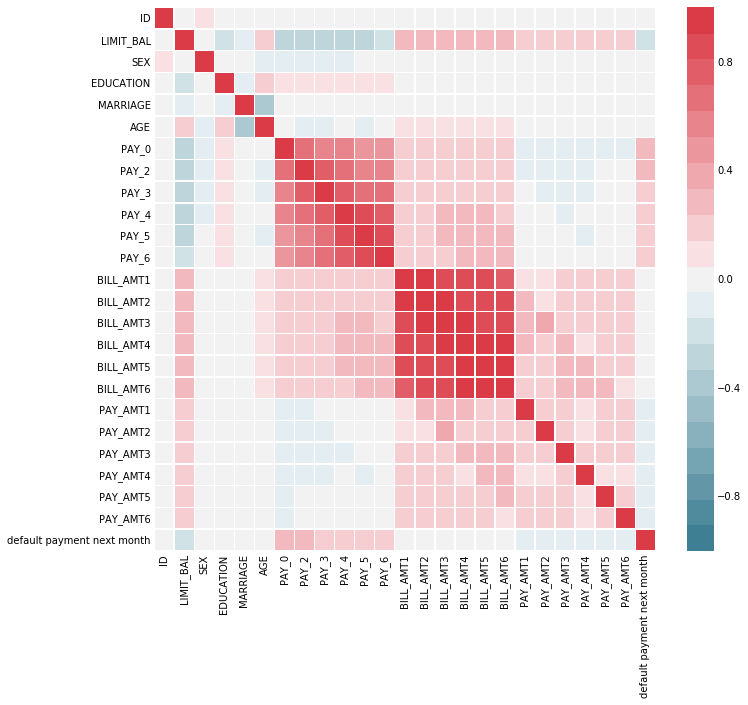

In [96]:
#heatmap to identify correlation. Looks like Repayment Status (Pay_0, Pay_2, etc) have a high correlation with default payment next month 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(credit_card_default.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21),
           linewidths=.5, ax=ax);

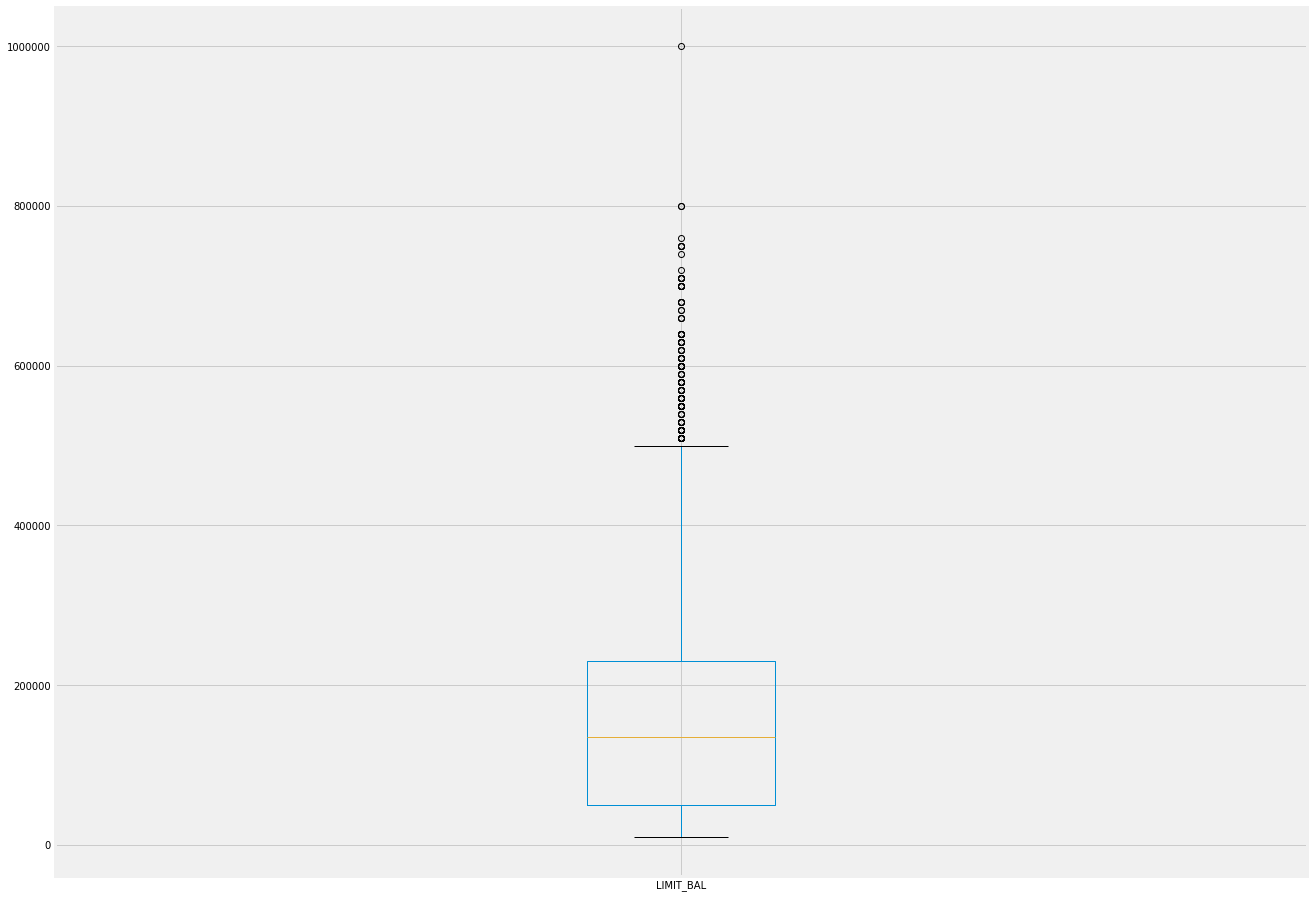

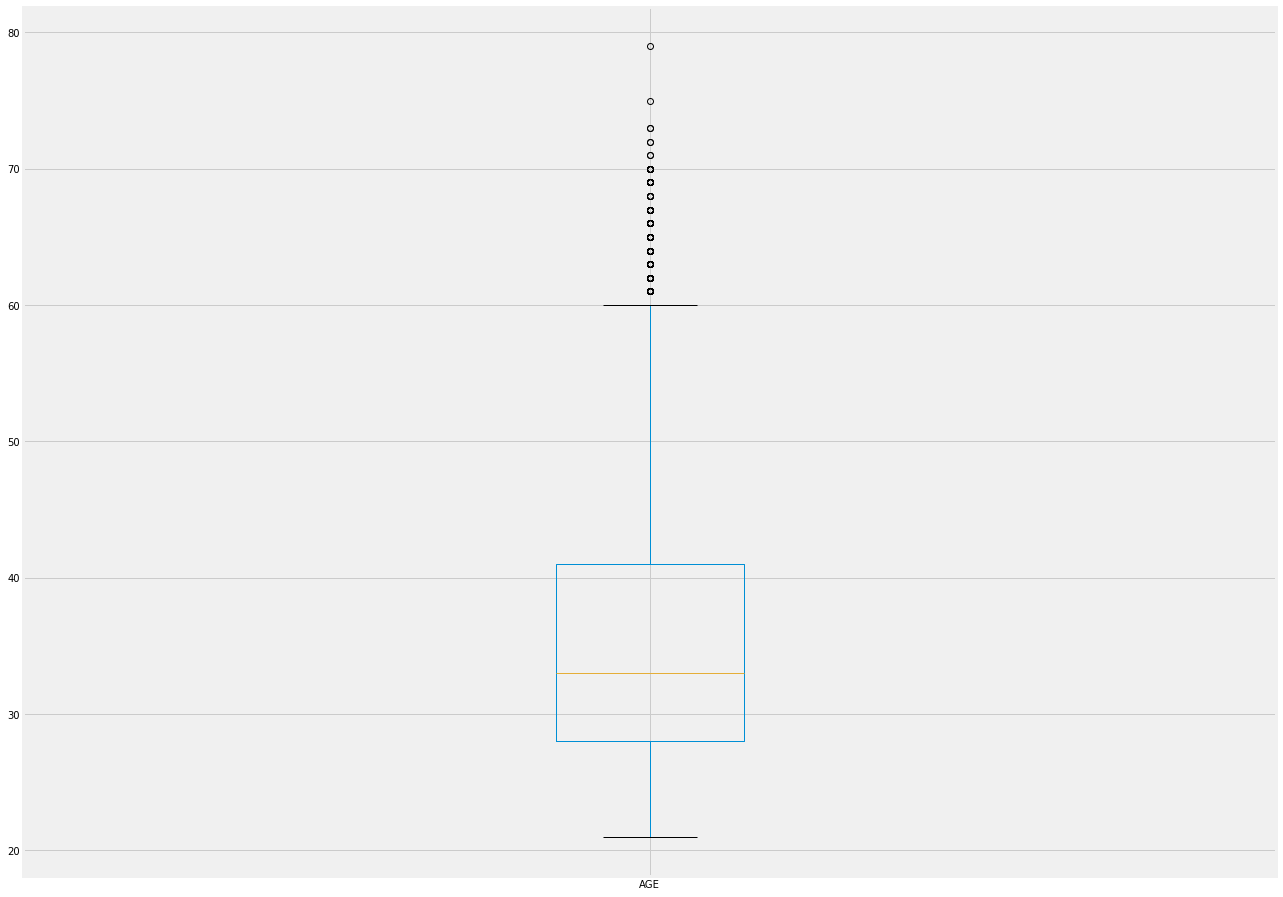

In [97]:
#check for outliers via a boxplot for 'AGE' and 'LIMIT BALANCE'
credit_card_default.loc[:,['LIMIT_BAL']].plot(kind='box', figsize=(20,16))
credit_card_default.loc[:,['AGE']].plot(kind='box', figsize=(20,16));

2    10634
1     7982
3     3581
5      184
4       76
6       33
0       10
Name: EDUCATION, dtype: int64


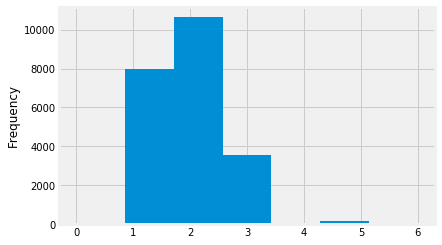

In [98]:
#look at the distribution of 'Education' from the data 
print(credit_card_default.loc[:,'EDUCATION'].value_counts())
ax = credit_card_default.loc[:,'EDUCATION'].plot(kind='hist', bins=7)

female    13729
male       8771
Name: SEX, dtype: int64


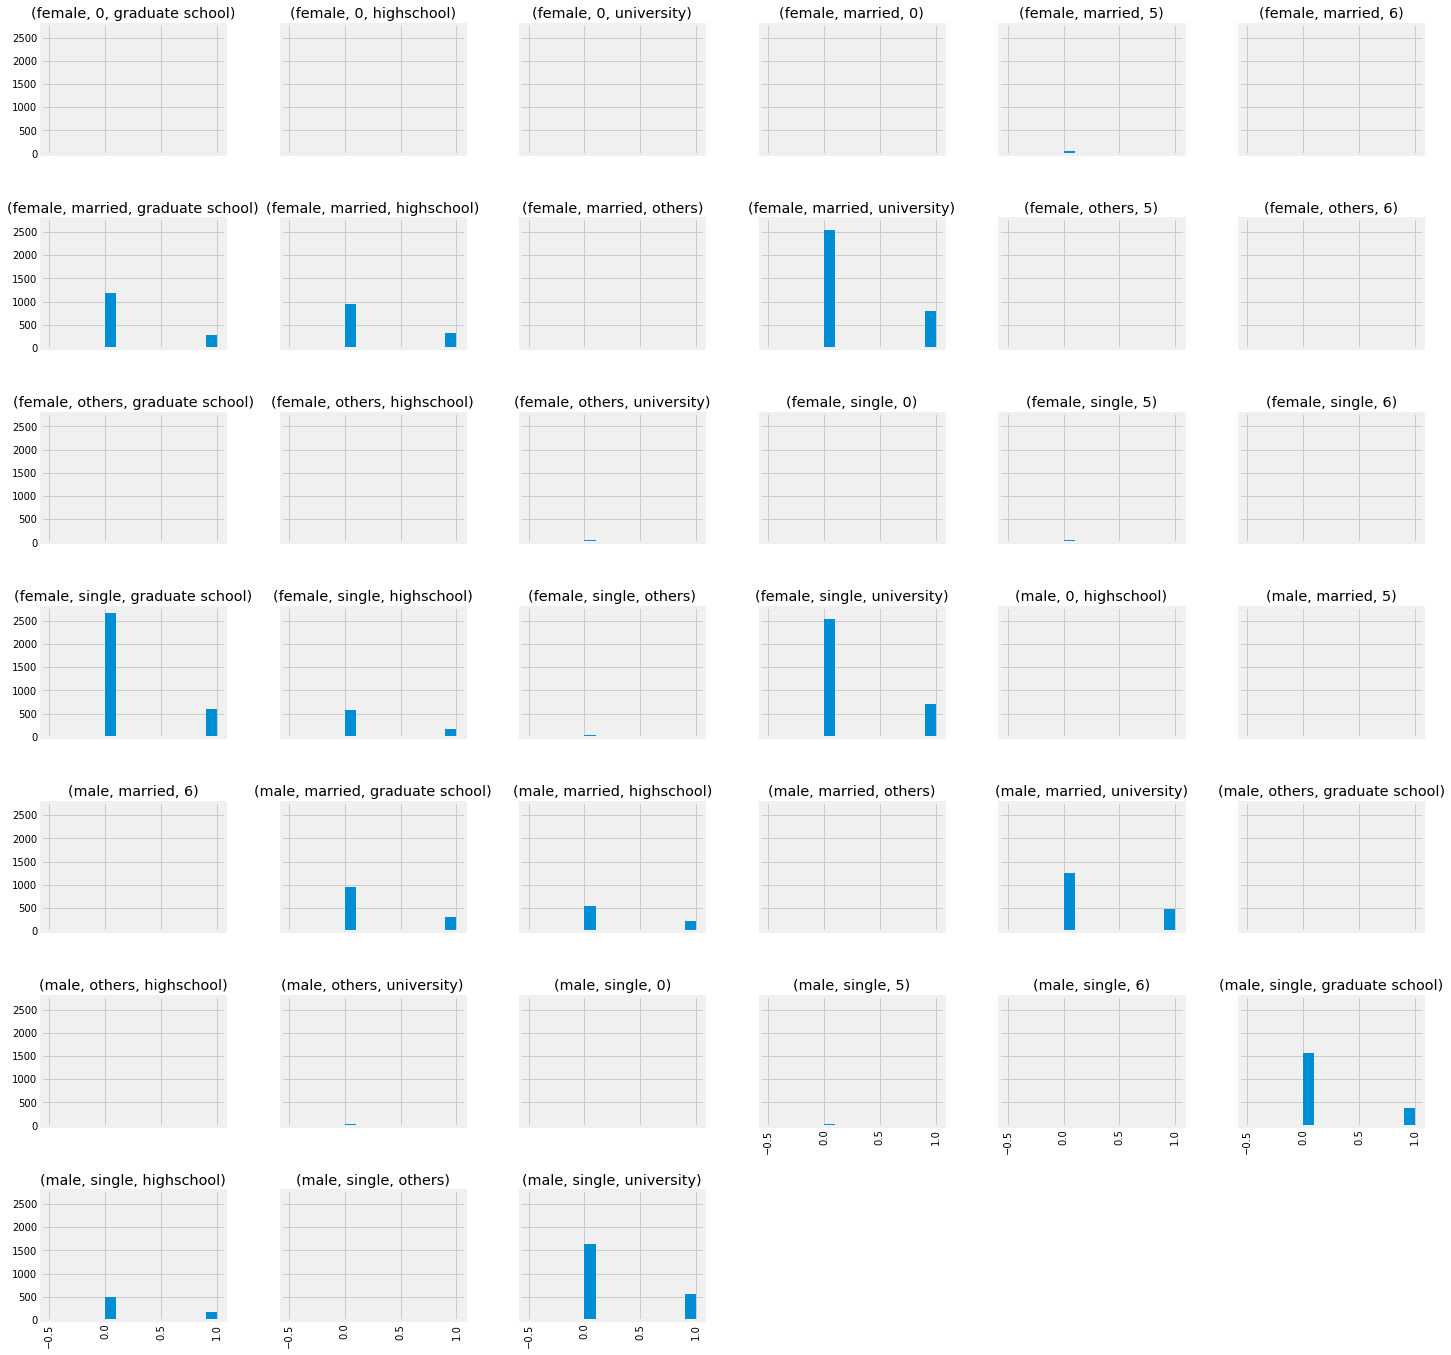

In [99]:
#looking at the demographics (Sex, Marriage, Education) and default payment next month 
credit_card_default['SEX'] = credit_card_default['SEX'].replace({1:'male', 2:'female'})
credit_card_default['MARRIAGE'] = credit_card_default['MARRIAGE'].replace({1:'married', 2:'single', 3:'others'})
credit_card_default['EDUCATION'] = credit_card_default['EDUCATION'].replace({1:'graduate school', 2:'university', 3:'highschool', 4:'others'})
print(credit_card_default.loc[:,'SEX'].value_counts())
credit_card_default.hist(column='default payment next month', by=['SEX','MARRIAGE', 'EDUCATION'], figsize=(24, 24), sharex=True, sharey=True);

In [103]:
#realize that there are 0 in the data where it does not belong to any category
print(credit_card_default.loc[:,'MARRIAGE'].value_counts())

single     12219
married     9990
others       255
0             36
Name: MARRIAGE, dtype: int64


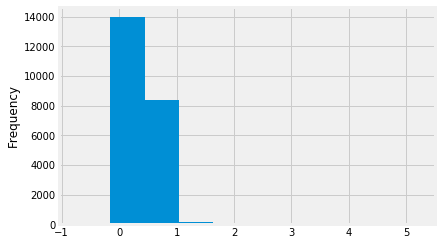

In [136]:
 #(Amount of bill statement - Amount of previous payment)/(Limit Balance) - still trying to figure out what visualization to do with this data
credit_card_default['Bill_Pay_1'] = (credit_card_default['BILL_AMT1'] - credit_card_default['PAY_AMT1'])/credit_card_default['LIMIT_BAL']
credit_card_default['Bill_Pay_2'] = (credit_card_default['BILL_AMT2'] - credit_card_default['PAY_AMT2'])/credit_card_default['LIMIT_BAL']
credit_card_default['Bill_Pay_3'] = (credit_card_default['BILL_AMT3'] - credit_card_default['PAY_AMT3'])/credit_card_default['LIMIT_BAL']
credit_card_default['Bill_Pay_4'] = (credit_card_default['BILL_AMT4'] - credit_card_default['PAY_AMT4'])/credit_card_default['LIMIT_BAL']
credit_card_default['Bill_Pay_5'] = (credit_card_default['BILL_AMT5'] - credit_card_default['PAY_AMT5'])/credit_card_default['LIMIT_BAL']
credit_card_default['Bill_Pay_6'] = (credit_card_default['BILL_AMT6'] - credit_card_default['PAY_AMT6'])/credit_card_default['LIMIT_BAL']

credit_card_default['Bill_Pay_Avg'] = (credit_card_default['Bill_Pay_1'] +
                                        credit_card_default['Bill_Pay_2'] +
                                        credit_card_default['Bill_Pay_3'] +
                                        credit_card_default['Bill_Pay_4'] +
                                        credit_card_default['Bill_Pay_5'] +
                                        credit_card_default['Bill_Pay_6'])/6
ax = credit_card_default.loc[:,'Bill_Pay_Avg'].plot(kind='hist', bins=10)

 0    11069
-1     4322
 1     2830
 2     2093
-2     1830
 3      243
 4       63
 8       17
 5       17
 6        9
 7        7
Name: PAY_0, dtype: int64


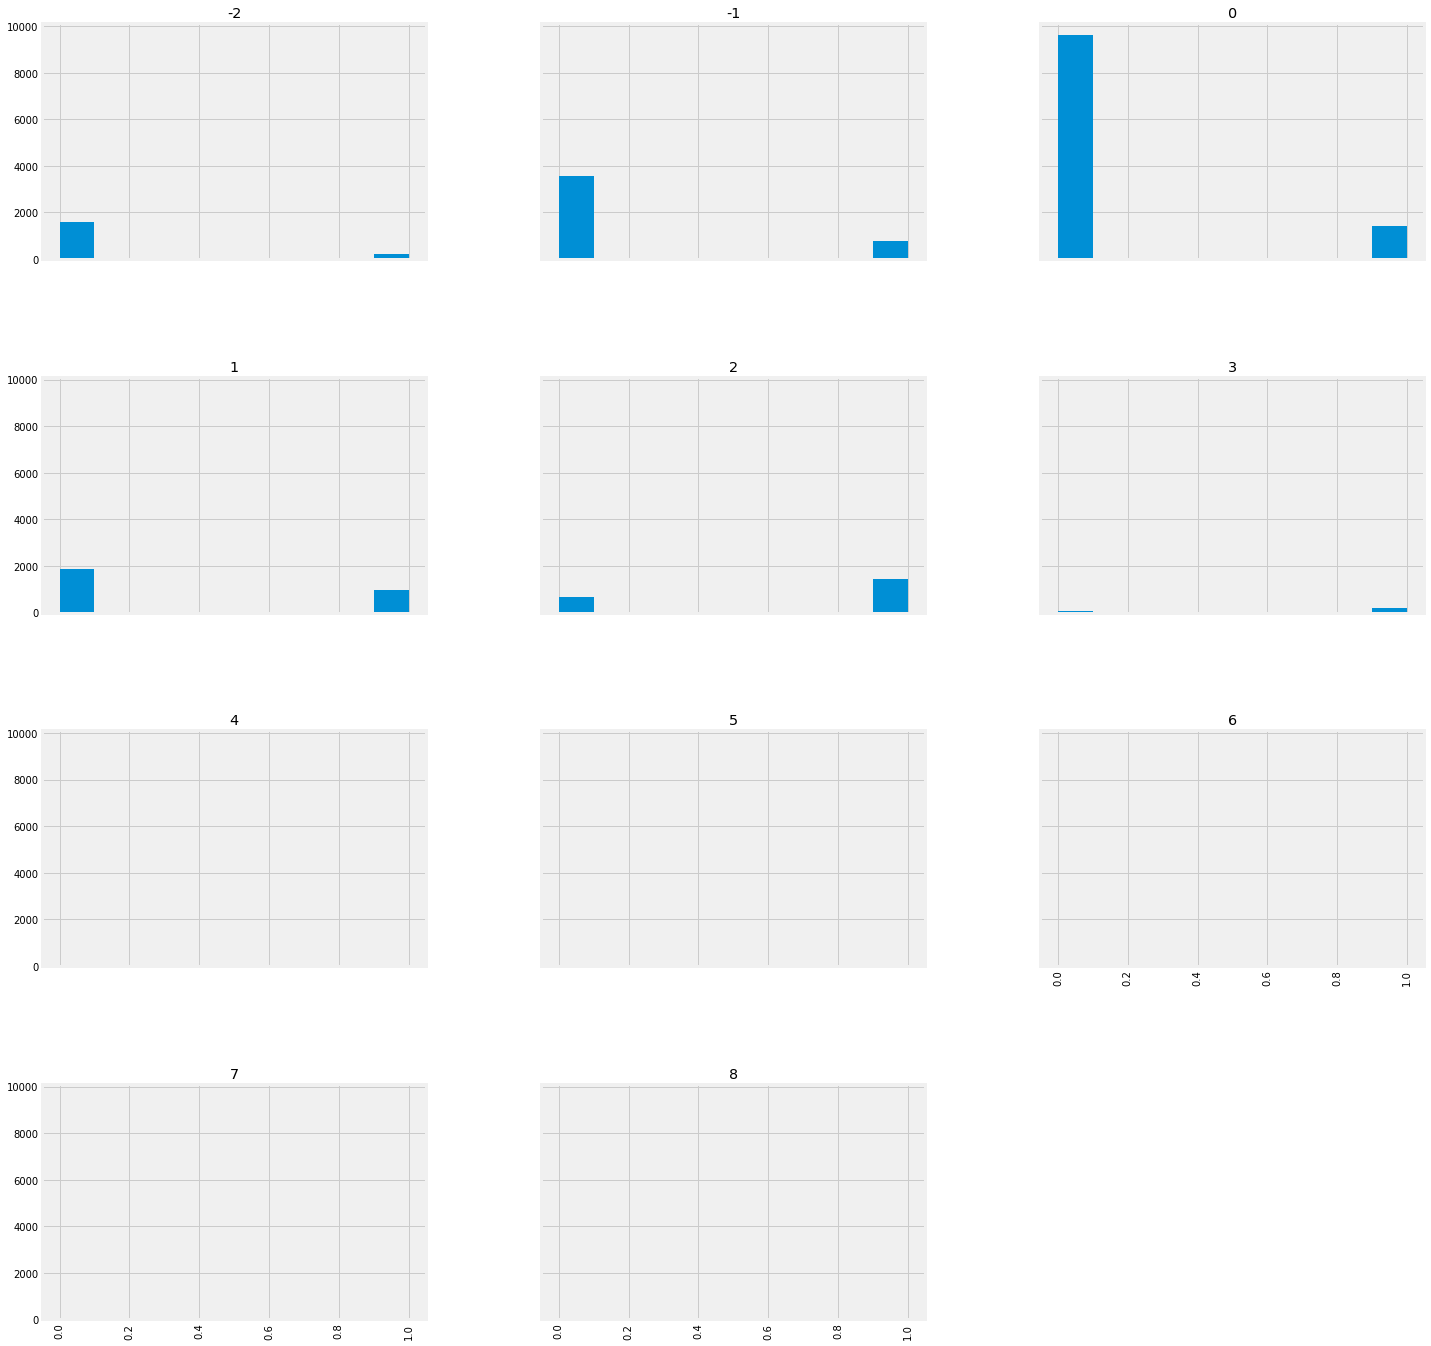

In [127]:
#Repayment Status compared to default payment next month 
print(credit_card_default.loc[:,'PAY_0'].value_counts())
credit_card_default.hist(column='default payment next month', by=['PAY_0'], figsize=(24, 24), sharex=True, sharey=True);

# Clearly identify...

#### Shortcomings of your data
 - Data may not have all the features necessary to predict the default payment next month. Instead, it is already provided a set of variables to work off of. 

#### Any assumptions that you will need to make in light of those shortcomings

- Assuming that no other variables will be a better prediction of the default payment next month other than the variables provided

#### At least five things you might try as ways to improve your model

- Better feature engineering, pay, bill amount and pay amount work together and not separately 
- Better model 
- Identify correlation vs causation
- Addressing the threshold
- Understand the data a little more 

#### What you think is the most appropriate metric for evaluating the models you will build. 

- Recall metric is a good evaluation of the model because I want to predict the percentage of total relevant results correctly classified by the model.